In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics  import r2_score
import matplotlib.pyplot as plt 
import seaborn as sns

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
df = pd.read_csv("dataset3.csv", delimiter = ';')
df.sample(5)#эта команда выведет пять случайных строк таблицы, таблица не отобразиться полностью

In [ ]:
df.info()#общая информация о столбцах, типах и пропущенных значениях

In [9]:
df.describe()#общие статистики

,Продолжительность эксплуатации,Количество ремонтов,Температура окр среды,Срок эксплуатации,Внезаплные отказы,Изделия с дефектами,Замена деталий,Смена обслуживания,Влажность окр среды,Страна производитель
count,50.00000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,14.00000,8.420000,22.020000,23.980000,0.480000,0.560000,0.460000,0.540000,58.280000,1.960000
std,9.46314,6.556162,5.231342,8.125269,0.504672,0.501427,0.503457,0.503457,23.267776,0.832013
min,1.00000,0.000000,14.000000,11.000000,0.000000,0.000000,0.000000,0.000000,20.000000,1.000000
25%,5.00000,2.250000,17.000000,17.250000,0.000000,0.000000,0.000000,0.000000,38.250000,1.000000
50%,13.00000,7.000000,22.000000,27.000000,0.000000,1.000000,0.000000,1.000000,65.000000,2.000000
75%,22.50000,13.500000,26.750000,30.000000,1.000000,1.000000,1.000000,1.000000,76.750000,3.000000
max,30.00000,20.000000,30.000000,35.000000,1.000000,1.000000,1.000000,1.000000,96.000000,3.000000


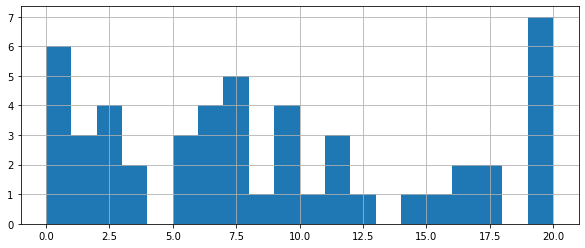

In [43]:
df['Количество ремонтов'].hist(bins=20,figsize=(10,4)); # как распределено количество ремонтов

In [2]:
df[df['Количество ремонтов']>10]['Продолжительность эксплуатации'].count()
#Попробуем предсказать будет ли у модели больше 10 количеств ремонта или нет. В этмо случае у нас получается сбалансированный набор данных. Ниже выведем список столбцов и отберем те, которые будем использовать для классификатора.

NameError: name 'df' is not defined

In [66]:
df.columns # список столбцов нашего датасета

Index(['Продолжительность эксплуатации', 'Количество ремонтов',
       'Температура окр среды', 'Срок эксплуатации', 'Внезаплные отказы',
       'Изделия с дефектами', 'Замена деталий', 'Смена обслуживания',
       'Влажность окр среды', 'Страна производитель'],
      dtype='object')

In [67]:
col=[
    'Продолжительность эксплуатации', 'Количество ремонтов',
       'Температура окр среды', 'Срок эксплуатации', 'Внезаплные отказы',
       'Изделия с дефектами', 'Замена деталий', 'Смена обслуживания',
       'Влажность окр среды', 'Страна производитель'
]

In [68]:
# код ниже преобразует категорийные данные в переменные и заполняет пропуски наиболее вероятным значением
X=pd.DataFrame()
for i in col:
    if df[i].dtype.name != 'object':
        X[i]=df[i].copy()
        X.loc[X[i].isna(),i]=X[i].median()
    else:
        X[i]=pd.factorize(df[i])[0]

In [69]:
X.sample(10)# результат, подготовленные данные

,Продолжительность эксплуатации,Количество ремонтов,Температура окр среды,Срок эксплуатации,Внезаплные отказы,Изделия с дефектами,Замена деталий,Смена обслуживания,Влажность окр среды,Страна производитель
4,2.0,5.0,27.0,24.0,0.0,1.0,0.0,1.0,65.0,1.0
34,17.0,20.0,23.0,29.0,1.0,0.0,0.0,1.0,38.0,3.0
48,5.0,6.0,21.0,33.0,0.0,1.0,0.0,0.0,84.0,2.0
41,4.0,9.0,25.0,19.0,0.0,0.0,1.0,1.0,24.0,3.0
0,9.0,0.0,18.0,34.0,0.0,1.0,1.0,0.0,87.0,1.0
10,9.0,0.0,16.0,35.0,0.0,1.0,1.0,0.0,41.0,1.0
46,17.0,16.0,24.0,27.0,0.0,0.0,0.0,0.0,20.0,1.0
36,2.0,2.0,23.0,32.0,1.0,0.0,1.0,1.0,84.0,2.0
33,5.0,9.0,26.0,30.0,1.0,1.0,1.0,1.0,58.0,3.0
19,14.0,15.0,18.0,14.0,1.0,1.0,0.0,1.0,58.0,2.0


In [70]:
# Y будет равен нулю если отзывов 10 и меньше, и единице если больше 10
Y=df['Количество ремонтов'].apply(lambda x : 1 if x>10 else 0).values

In [71]:
#разделим набор на тренировочный и тестовый
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [72]:
# создаем и тренируем модель, отдельно можно провести подбор параметров для повышения точности
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train,y_train)

RandomForestClassifier()

In [73]:
importances=model.feature_importances_
indices=np.argsort(importances)[::-1]

ar_f=[]
for f,idx in enumerate(indices):
    ar_f.append([round(importances[idx],4),col[idx]])
print('Значимость признака: ')
ar_f.sort(reverse=True)
ar_f

Значимость признака: 


[[0.6377, 'Количество ремонтов'],
 [0.0747, 'Влажность окр среды'],
 [0.0711, 'Продолжительность эксплуатации'],
 [0.0655, 'Срок эксплуатации'],
 [0.0642, 'Температура окр среды'],
 [0.025, 'Страна производитель'],
 [0.0236, 'Внезаплные отказы'],
 [0.015, 'Замена деталий'],
 [0.0133, 'Изделия с дефектами'],
 [0.0097, 'Смена обслуживания']]

(-1.0, 10.0)

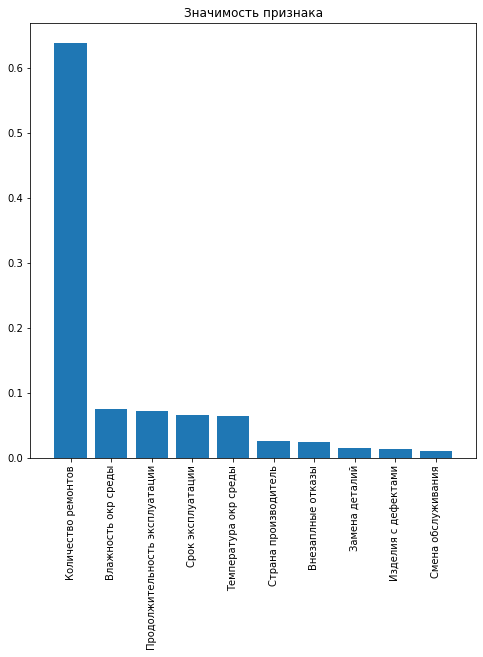

In [74]:
#столбчатая диаграмма
d_first=len(col)
plt.figure(figsize=(8,8))
plt.title('Значимость признака')
plt.bar(range(d_first),importances[indices[:d_first]],align='center')
plt.xticks(range(d_first),np.array(col)[indices[:d_first]],rotation=90)
plt.xlim([-1,d_first])

In [76]:
model.predict(X_test)
# как выглядит результат предсказания для тестовой выборки

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 1], dtype=int64)

In [77]:
y_test
# как выглядядт результаты тестового набора

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [79]:
# метрика r2
r2_score(model.predict(X_test),y_test)

0.5238095238095238

In [80]:
# метрика, насколько точно мы предсказываем правильные значения как для 0, так и 1
from sklearn import metrics
print('Accuracy:',metrics.accuracy_score(y_test,model.predict(X_test)))

Accuracy: 0.9


In [81]:
# матрица количества правильно и ошибочно угаданных классов
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,model.predict(X_test))

array([[6, 0],
       [1, 3]], dtype=int64)